In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
movie_ratings = pd.read_csv('Movie Rating.csv')

In [3]:
movie_names = pd.read_csv('movies_metadata.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movie_users = pd.read_csv('ratings.csv')

In [5]:
movie_names = movie_names[['original_title', 'id']]

In [6]:
movie_names.columns

Index(['original_title', 'id'], dtype='object')

In [7]:
movie_users.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
movie_names = movie_names[~movie_names['id'].str.contains("(\d{4}-\d\d-\d\d)")]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [9]:
movie_names['id'] = movie_names['id'].astype(int)

In [10]:
movie_ppl = movie_users.merge(movie_names, left_on = 'movieId', right_on='id').drop(columns=['id','timestamp'])

In [11]:
movie_ppl.head()

,userId,movieId,rating,original_title
0,1,110,1.0,Trois couleurs : Rouge
1,11,110,3.5,Trois couleurs : Rouge
2,22,110,5.0,Trois couleurs : Rouge
3,24,110,5.0,Trois couleurs : Rouge
4,29,110,3.0,Trois couleurs : Rouge


In [12]:
movie_ppl.groupby('userId').count().describe()

,movieId,rating,original_title
count,265917.000000,265917.000000,265917.000000
mean,43.012056,43.012056,43.012056
std,77.818735,77.818735,77.818735
min,1.000000,1.000000,1.000000
25%,7.000000,7.000000,7.000000
50%,16.000000,16.000000,16.000000
75%,45.000000,45.000000,45.000000
max,3594.000000,3594.000000,3594.000000


In [13]:
movie_ppl.groupby('movieId').count().describe()

,userId,rating,original_title
count,7565.000000,7565.000000,7565.000000
mean,1511.915003,1511.915003,1511.915003
std,5305.238187,5305.238187,5305.238187
min,1.000000,1.000000,1.000000
25%,7.000000,7.000000,7.000000
50%,45.000000,45.000000,45.000000
75%,469.000000,469.000000,469.000000
max,91082.000000,91082.000000,91082.000000


In [14]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [15]:
movies = movie_ppl.merge(movie_ratings, left_on='original_title', right_on = 'movie', copy=False)

In [16]:
movies = movies.drop(columns=['original_title'])

In [17]:
movies.head()

,userId,movieId,rating,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,303,665,5.0,Ben-Hur,2016,38,5.7,25,55,4.0,1.9,2.85,1.25,2.75,2.0,3.0,1.0,3.0
1,314,665,5.0,Ben-Hur,2016,38,5.7,25,55,4.0,1.9,2.85,1.25,2.75,2.0,3.0,1.0,3.0
2,434,665,4.0,Ben-Hur,2016,38,5.7,25,55,4.0,1.9,2.85,1.25,2.75,2.0,3.0,1.0,3.0
3,493,665,3.0,Ben-Hur,2016,38,5.7,25,55,4.0,1.9,2.85,1.25,2.75,2.0,3.0,1.0,3.0
4,866,665,5.0,Ben-Hur,2016,38,5.7,25,55,4.0,1.9,2.85,1.25,2.75,2.0,3.0,1.0,3.0


In [18]:
len(movie_ppl)

11437637

In [19]:
len(movies)

1601

In [20]:
movies['movie'].unique()

array(['Ben-Hur', 'The Magnificent Seven', 'Morgan', 'Ghostbusters',
       'Moana', 'The Angry Birds Movie', 'Rings', 'Triple 9', 'Cell',
       'Resident Evil: The Final Chapter', 'Jane Got a Gun', 'Exposed'],
      dtype=object)

## Linear Regression Model

In [21]:
from sklearn import linear_model

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
reg = linear_model.LinearRegression()


In [24]:
movies = movies.sample(len(movies))

In [25]:
movies.reset_index(inplace=True,drop=True)

In [26]:
len(movies)*.8

1280.8000000000002

In [27]:
train = movies[:1281]

In [28]:
test = movies[1281:]

In [29]:
reg.fit(train.loc[:,'metascore':], train[['rating']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predicts = reg.predict(test.loc[:,'metascore':])

Coefficients: 
 [[-4.43670858e-01  1.65030419e+00 -1.38157633e-01  3.22445548e-01
  -7.05545234e-01 -2.21835429e-02  8.25152097e-01 -6.90788166e-03
   1.61222774e-02  8.28273353e+00 -3.16964055e+00  1.81849921e+00
  -4.93288905e+00]]
Mean squared error: 1.02
Variance score: 0.02


Text(0.5, 1.0, 'Linear Regression Model to Predict User Ratings From Other Rating Metrics')

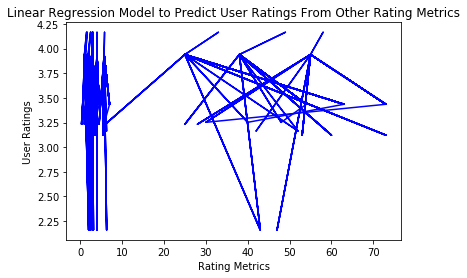

In [31]:
print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(test[['rating']], predicts))
print('Variance score: %.2f' % r2_score(test[['rating']], predicts))

plt.plot(test.loc[:,'metascore':],predicts, color = "blue")
plt.xlabel("Rating Metrics")
plt.ylabel("User Ratings")
plt.title("Linear Regression Model to Predict User Ratings From Other Rating Metrics")

## Recommendation Algorithm (Content Based Filtering)

In [32]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [33]:
ratings = movies.groupby('movie').mean().loc[:,'metascore':]

In [34]:
cos_sim = cosine_similarity(ratings,ratings)

In [35]:
titles = dict(zip(range(0,13), ratings.index))

In [36]:
import operator

In [37]:
def get_recommendations(title):
    index = [pair[0] for pair in titles.items() if pair[1] == title][0]
    dict1 = dict(zip(range(0,13), cos_sim[index]))    
    similars = [movie[0] for movie in sorted(dict1.items(), key=operator.itemgetter(1), reverse=True)[1:4]]
    return [titles[i] for i in similars]

In [38]:
get_recommendations("Rings")

['Ben-Hur', 'Resident Evil: The Final Chapter', 'Exposed']

## Personalized Rating Metric

In [39]:
len(movies['userId'].unique())

1557

In [40]:
len(movies['userId'])

1601

# Webscraped Data

In [41]:
imdb = pd.read_csv('data.csv')

In [42]:
imdb.head()

,Title,Imdb Score,Metascore
0,Pulp Fiction,8.9,94.0
1,The Amazing Spider-Man 2,6.6,53.0
2,The Shawshank Redemption,9.3,80.0
3,Star Wars: Episode IV - A New Hope,8.6,90.0
4,Back to the Future,8.5,87.0


In [43]:
movies = imdb.merge(movie_ppl, left_on='Title', right_on='original_title')

In [44]:
movies.drop(columns = ['movieId', 'original_title'], inplace=True)

In [45]:
movies.head()

,Title,Imdb Score,Metascore,userId,rating
0,Pulp Fiction,8.9,94.0,229,4.0
1,Pulp Fiction,8.9,94.0,314,3.5
2,Pulp Fiction,8.9,94.0,375,4.5
3,Pulp Fiction,8.9,94.0,481,5.0
4,Pulp Fiction,8.9,94.0,609,5.0


In [46]:
len(movies['Title'].unique())

2066

In [47]:
len(movies['userId'].unique())

255488

In [48]:
len(movies)

6331233

In [49]:
grouped = movies.groupby(['userId', 'Title']).mean()

In [50]:
grouped.head()

Imdb Score  Metascore  rating
userId Title                                                   
1      Fools Rush In                    6.00       37.0     4.0
       License to Wed                   5.30       25.0     4.0
       Rocky Balboa                     7.10       63.0     5.0
       Sleepless in Seattle             6.80       72.0     5.0
2      A Nightmare on Elm Street        6.35       55.5     4.0

In [53]:
import requests
from lxml import html
from bs4 import BeautifulSoup

In [76]:
import re

In [94]:
from pandas.io.json import json_normalize

In [154]:
resp = requests.get("https://www.rottentomatoes.com/browse/dvd-streaming-all/")

In [155]:
soup = BeautifulSoup(resp.content, 'lxml')

In [156]:
soup.find_all('div',{ "class" : "mb-movie" })

[]

In [157]:
#for movie in soup.find_all('div',{ "class" : "mb-movie" }):
    

In [ ]:
equations = []

In [53]:
for i in range(len(movies['userId'].unique())):
    df = grouped[grouped.index['userId'] == i]
    reg.fit(df.loc[:,['Imdb Score', 'Metascore']], df[['rating']])
    equations.append(reg.coef_)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [118]:
from selenium import webdriver

In [211]:
driver = webdriver.Chrome("../SAAS Film Rating Project/chromedriver")

In [212]:
driver.get("https://www.rottentomatoes.com/browse/dvd-streaming-all/")

In [213]:
soup = BeautifulSoup(driver.page_source, 'lxml')

In [214]:
titles = []
scores = []

In [205]:
import time

In [ ]:
page_num = 0
while driver.find_element_by_id('show-more-btn'):
    driver.find_element_by_id('show-more-btn').click()
    page_num += 1
    for movie in soup.find_all('div',{ "class" : "mb-movie" }):
        titles.append(movie.h3.string)
        scores.append(movie.span.span.next_sibling.next_sibling.next_sibling.next_sibling.text)
    print("getting page number "+str(page_num))
    time.sleep(1)

getting page number 1
getting page number 2
getting page number 3
getting page number 4
getting page number 5
getting page number 6
getting page number 7
getting page number 8
getting page number 9
getting page number 10
getting page number 11
getting page number 12
getting page number 13
getting page number 14
getting page number 15
getting page number 16
getting page number 17
getting page number 18
getting page number 19
getting page number 20
getting page number 21
getting page number 22
getting page number 23
getting page number 24
getting page number 25
getting page number 26
getting page number 27
getting page number 28
getting page number 29
getting page number 30
getting page number 31
getting page number 32
getting page number 33
getting page number 34
getting page number 35
getting page number 36
getting page number 37
getting page number 38
getting page number 39
getting page number 40
getting page number 41
getting page number 42
getting page number 43
getting page number 

In [217]:
scores;

[]